# playing with big files that comes from SAP

# Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## Set constants and values

In [3]:
usecolslist = ['SCHEMA_NAME','GROUP_NAME','SUBTYPE','TABLE_NAME']

In [4]:
data = pd.read_csv("../datos/sap/M_TABLES.csv")
#data_tg  = pd.read_csv("../datos/sap/SAPD58_TABLE_GROUPS.csv", names = usecolslist)
data_tg  = pd.read_csv("../datos/sap/SAPD58_TABLE_GROUPS.csv")

In [5]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data

,SCHEMA_NAME,TABLE_NAME,RECORD_COUNT,TABLE_SIZE,IS_COLUMN_TABLE,TABLE_TYPE,IS_PARTITIONED,IS_REPLICATED,HAS_RECORD_COMMIT_TIMESTAMP
0,SYS,_SYS_SS_TBL_15805805_RET,0,0,False,ROW,False,False,False
1,SYS,_SYS_SS_TBL_15805819_RET,0,0,False,ROW,False,False,False
2,_SYS_BIC,sap.hana.modules.FIN/CV_LFIAO0001_IEPS_MD_VEND...,0,0,False,ROW,False,False,False
3,SYS,_SYS_SS2_ITV_ALL_PARAMETERS_15805857_TBL,0,0,False,ROW,False,False,False
4,SYS,_SYS_SS2_ITV_TABLE_PARAMETERS_15805857_TBL,0,0,False,ROW,False,False,False
...,...,...,...,...,...,...,...,...,...
100009,SAPD58,WDR_TEST_SOALPHA,0,1328,True,COLUMN,False,False,False
100010,SAPD58,WDY_CHIP_PORTT,1045,143407,True,COLUMN,False,False,False
100011,SAPD58,WDY_UI_ENUM_VALT,358,117453,True,COLUMN,False,False,False
100012,SAPD58,WEB_COOKIE,0,1328,True,COLUMN,False,False,False


In [6]:
data_tg

,id,SCHEMA_NAME,TABLE_NAME,GROUP_TYPE,SUBTYPE,GROUP_NAME,IS_GROUP_LEAD
0,0,SAPD58,/BIC/SZZ_AVV105,BW_IOBJ,SID,ZZ_AVV105,False
1,1,SAPD58,/BIC/SZZ_AVV106,BW_IOBJ,SID,ZZ_AVV106,False
2,2,SAPD58,/BIC/SZZ_AVV107,BW_IOBJ,SID,ZZ_AVV107,False
3,3,SAPD58,/BIC/SZZ_AVV141,BW_IOBJ,SID,ZZ_AVV141,False
4,4,SAPD58,/BIC/SZZ_AVV151,BW_IOBJ,SID,ZZ_AVV151,False
...,...,...,...,...,...,...,...
26963,26963,SAPD58,/B28/DN3IC0HEP,BW_CUBE,DIM,/CPMB/N3IC0HE,False
26964,26964,SAPD58,/B28/FN3IC0HE,BW_CUBE,FACT_IMO,/CPMB/N3IC0HE,False
26965,26965,SAPD58,TR_4VT56CNHDEH529F1W04I3Y3Z2_SIMULATION,BW_DTP,ERROR_STACK,NaN,False
26966,26966,SAPD58,/BIC/ALSDAO00362,BW_DSO,ACTIVE,LSDAO0036,False


## Read tables from  SAP M_TABLES That provide table size and record count details & Table Groups that make a relation betweek objects and tables


# Agregar pro campos y luego regresar a un data frame por medio de  .aggregate(np.sum)

data_tg_g = data_tg.groupby(['SCHEMA_NAME','GROUP_NAME','SUBTYPE','TABLE_NAME'])
type(data_tg_g)

**.aggregate(np.sum)**

data_tg_g = data_tg_g.aggregate(np.sum)
type(data_tg_g )

**pandas.core.frame.DataFrame**



# Filter data from SAPD58 (optional)

In [7]:
#data = data[(data["TABLE_SIZE	"] == 'SAPD58')]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100014 entries, 0 to 100013
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   SCHEMA_NAME                  100014 non-null  object
 1   TABLE_NAME                   100014 non-null  object
 2   RECORD_COUNT                 100014 non-null  int64 
 3   TABLE_SIZE                   100014 non-null  int64 
 4   IS_COLUMN_TABLE              100014 non-null  bool  
 5   TABLE_TYPE                   100014 non-null  object
 6   IS_PARTITIONED               100014 non-null  bool  
 7   IS_REPLICATED                100014 non-null  bool  
 8   HAS_RECORD_COMMIT_TIMESTAMP  100014 non-null  bool  
dtypes: bool(4), int64(2), object(3)
memory usage: 4.2+ MB


In [9]:

cols_cat  = ['SCHEMA_NAME', 'IS_COLUMN_TABLE', 'TABLE_TYPE', 'IS_PARTITIONED', 'IS_REPLICATED']
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')


Columna SCHEMA_NAME: 28 subniveles
Columna IS_COLUMN_TABLE: 2 subniveles
Columna TABLE_TYPE: 2 subniveles
Columna IS_PARTITIONED: 2 subniveles
Columna IS_REPLICATED: 1 subniveles


# Check posible matches previus to joins

In [10]:
data_f = data[(data['TABLE_NAME']).str.contains('LSDAO0036', flags = re.IGNORECASE)]
data_f

,SCHEMA_NAME,TABLE_NAME,RECORD_COUNT,TABLE_SIZE,IS_COLUMN_TABLE,TABLE_TYPE,IS_PARTITIONED,IS_REPLICATED,HAS_RECORD_COMMIT_TIMESTAMP
24596,SAPD58,/BIC/ALSDAO00361,0,1328,True,COLUMN,True,False,False
58041,SAPD58,/BIC/ALSDAO00363,34774,684414,True,COLUMN,True,False,False
75704,SAPD58,/BIC/ALSDAO00362,34774,1290780,True,COLUMN,False,False,False


In [11]:
data_tg_f = data_tg[(data_tg['GROUP_NAME']) == 'LSDAO0036']
data_tg_f

,id,SCHEMA_NAME,TABLE_NAME,GROUP_TYPE,SUBTYPE,GROUP_NAME,IS_GROUP_LEAD
14017,14017,SAPD58,/BIC/ALSDAO00361,BW_DSO,QUEUE,LSDAO0036,False
26966,26966,SAPD58,/BIC/ALSDAO00362,BW_DSO,ACTIVE,LSDAO0036,False
26967,26967,SAPD58,/BIC/ALSDAO00363,BW_DSO,CHANGE_LOG,LSDAO0036,False


# Make a Join dataframes

In [12]:
newdata = pd.merge(data, data_tg, how='left', on =['SCHEMA_NAME','TABLE_NAME'] )
newdata[(newdata['GROUP_NAME']) == 'LSDAO0036']

,SCHEMA_NAME,TABLE_NAME,RECORD_COUNT,TABLE_SIZE,IS_COLUMN_TABLE,TABLE_TYPE,IS_PARTITIONED,IS_REPLICATED,HAS_RECORD_COMMIT_TIMESTAMP,id,GROUP_TYPE,SUBTYPE,GROUP_NAME,IS_GROUP_LEAD
24596,SAPD58,/BIC/ALSDAO00361,0,1328,True,COLUMN,True,False,False,14017.0,BW_DSO,QUEUE,LSDAO0036,False
58041,SAPD58,/BIC/ALSDAO00363,34774,684414,True,COLUMN,True,False,False,26967.0,BW_DSO,CHANGE_LOG,LSDAO0036,False
75704,SAPD58,/BIC/ALSDAO00362,34774,1290780,True,COLUMN,False,False,False,26966.0,BW_DSO,ACTIVE,LSDAO0036,False


# agregar una columna dummy

In [13]:
newdata.loc[:,'COUNT'] = 1

In [14]:
#help(pd.merge)

# Refill tables 
## GROUP_NAME = NaN with SYSTEM 
## SUBTYPE = NaN with SYSTEM_CTL value

In [15]:
newdata["GROUP_NAME"] = newdata["GROUP_NAME"].fillna("SYSTEM")
newdata["GROUP_TYPE"] = newdata["GROUP_TYPE"].fillna("SYSTEM")
newdata["SUBTYPE"] = newdata["SUBTYPE"].fillna("SYSTEM_CTL")
newdata["IS_GROUP_LEAD"] = newdata["IS_GROUP_LEAD"].fillna("False")
newdata["id"] = newdata["id"].fillna("9999")

# Comencemos representando la variable a predecir de forma binaria:
# 'yes' = 1, 'no' = 0
diccionario = {'COLUMN':1, 'ROW':0}
binario = newdata['TABLE_TYPE'].map(diccionario)
newdata['y_MEM'] = binario

newdata.loc[:,'y_IS_PARTITIONED'] = 0
newdata.loc[newdata['IS_PARTITIONED'] == True,'y_IS_PARTITIONED'] = 1
newdata.loc[:,'y_IS_COLUMN'] = 0
newdata.loc[newdata['IS_COLUMN_TABLE'] == True,'y_IS_COLUMN'] = 1

newdata.tail(100)
newdata[(newdata['GROUP_NAME']) == 'SYSTEM']

,SCHEMA_NAME,TABLE_NAME,RECORD_COUNT,TABLE_SIZE,IS_COLUMN_TABLE,TABLE_TYPE,IS_PARTITIONED,IS_REPLICATED,HAS_RECORD_COMMIT_TIMESTAMP,id,GROUP_TYPE,SUBTYPE,GROUP_NAME,IS_GROUP_LEAD,COUNT,y_MEM,y_IS_PARTITIONED,y_IS_COLUMN
0,SYS,_SYS_SS_TBL_15805805_RET,0,0,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
1,SYS,_SYS_SS_TBL_15805819_RET,0,0,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
2,_SYS_BIC,sap.hana.modules.FIN/CV_LFIAO0001_IEPS_MD_VEND...,0,0,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
3,SYS,_SYS_SS2_ITV_ALL_PARAMETERS_15805857_TBL,0,0,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
4,SYS,_SYS_SS2_ITV_TABLE_PARAMETERS_15805857_TBL,0,0,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100009,SAPD58,WDR_TEST_SOALPHA,0,1328,True,COLUMN,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,1,0,1
100010,SAPD58,WDY_CHIP_PORTT,1045,143407,True,COLUMN,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,1,0,1
100011,SAPD58,WDY_UI_ENUM_VALT,358,117453,True,COLUMN,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,1,0,1
100012,SAPD58,WEB_COOKIE,0,1328,True,COLUMN,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,1,0,1


In [16]:
newdata = newdata[(data["TABLE_SIZE"] > 0)]
newdata

,SCHEMA_NAME,TABLE_NAME,RECORD_COUNT,TABLE_SIZE,IS_COLUMN_TABLE,TABLE_TYPE,IS_PARTITIONED,IS_REPLICATED,HAS_RECORD_COMMIT_TIMESTAMP,id,GROUP_TYPE,SUBTYPE,GROUP_NAME,IS_GROUP_LEAD,COUNT,y_MEM,y_IS_PARTITIONED,y_IS_COLUMN
25,_SYS_STATISTICS,STATISTICS_SCHEDULE,215,33024,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
38,SAPD58,DDNTF_HIST,72,40192,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
40,SAPD58,DDNTT_HIST,72,22160,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
46,SAPD58,APC_APPL_TEXT,171,25800,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
61,SAPD58,AMC_APPL_TEXT,167,24424,False,ROW,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100009,SAPD58,WDR_TEST_SOALPHA,0,1328,True,COLUMN,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,1,0,1
100010,SAPD58,WDY_CHIP_PORTT,1045,143407,True,COLUMN,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,1,0,1
100011,SAPD58,WDY_UI_ENUM_VALT,358,117453,True,COLUMN,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,1,0,1
100012,SAPD58,WEB_COOKIE,0,1328,True,COLUMN,False,False,False,9999,SYSTEM,SYSTEM_CTL,SYSTEM,False,1,1,0,1


# Check Values

In [17]:
newdata[(newdata['GROUP_NAME']) == 'LSDAO0036']

,SCHEMA_NAME,TABLE_NAME,RECORD_COUNT,TABLE_SIZE,IS_COLUMN_TABLE,TABLE_TYPE,IS_PARTITIONED,IS_REPLICATED,HAS_RECORD_COMMIT_TIMESTAMP,id,GROUP_TYPE,SUBTYPE,GROUP_NAME,IS_GROUP_LEAD,COUNT,y_MEM,y_IS_PARTITIONED,y_IS_COLUMN
24596,SAPD58,/BIC/ALSDAO00361,0,1328,True,COLUMN,True,False,False,14017.0,BW_DSO,QUEUE,LSDAO0036,False,1,1,1,1
58041,SAPD58,/BIC/ALSDAO00363,34774,684414,True,COLUMN,True,False,False,26967.0,BW_DSO,CHANGE_LOG,LSDAO0036,False,1,1,1,1
75704,SAPD58,/BIC/ALSDAO00362,34774,1290780,True,COLUMN,False,False,False,26966.0,BW_DSO,ACTIVE,LSDAO0036,False,1,1,0,1


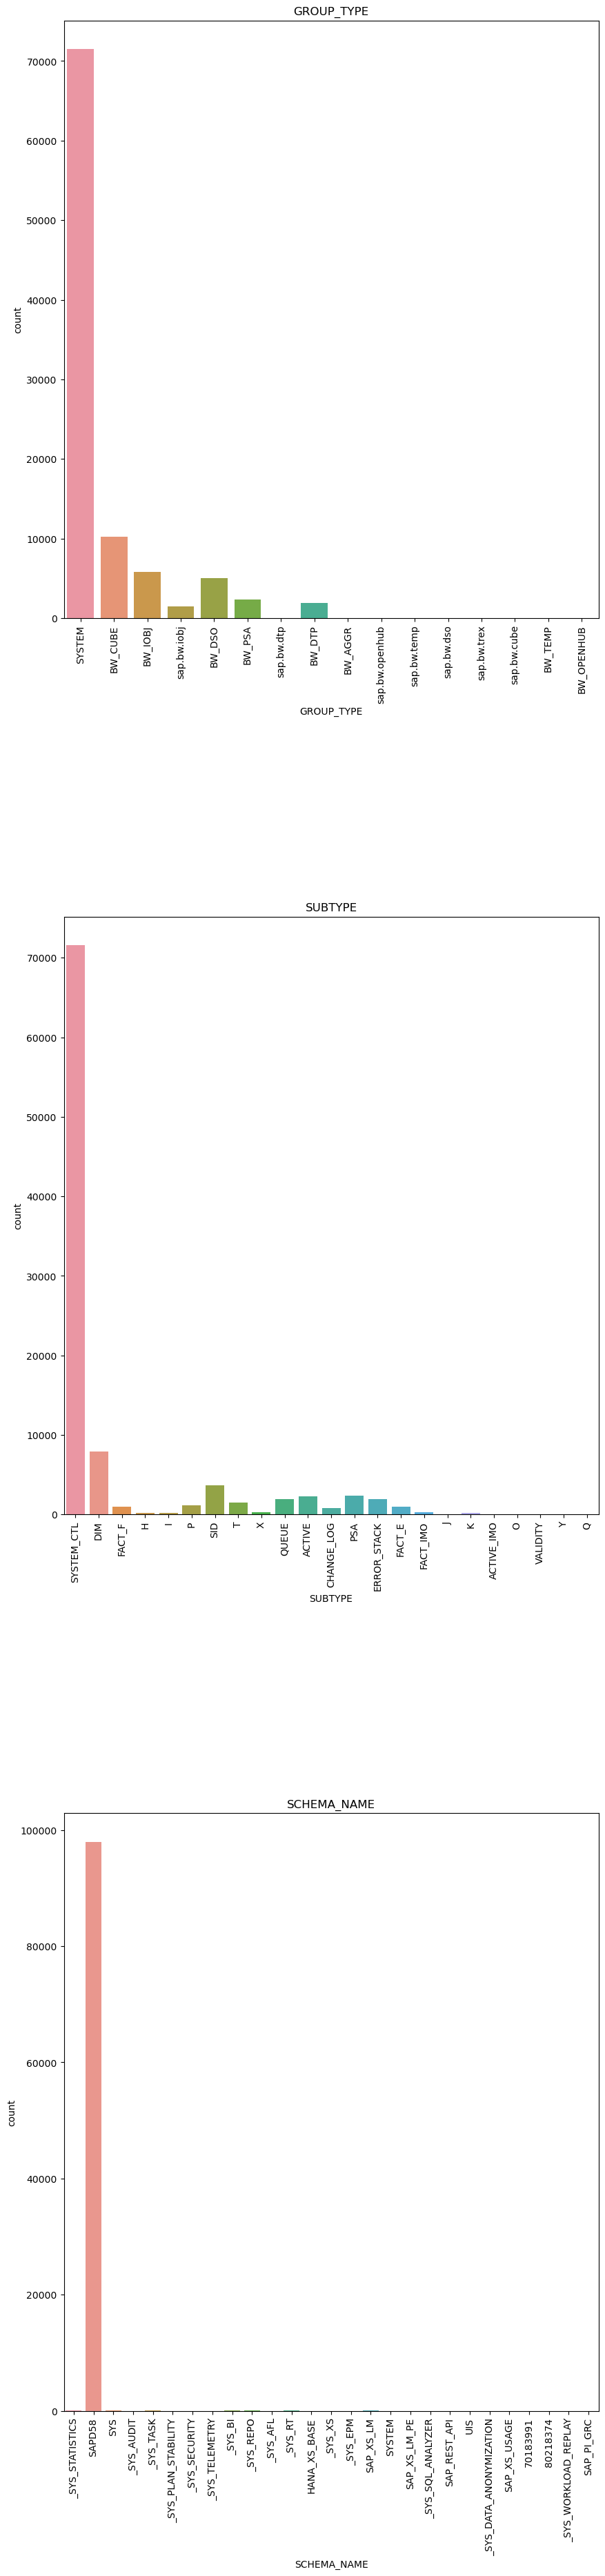

In [18]:
# 1. Par poutcome-job
col_cat = ['GROUP_TYPE', 'SUBTYPE', 'SCHEMA_NAME']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=newdata, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [19]:
newdata_total = newdata[(newdata["SCHEMA_NAME"] == 'SAPD58')]

In [20]:
type(newdata_total)
newdata_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97966 entries, 38 to 100013
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SCHEMA_NAME                  97966 non-null  object
 1   TABLE_NAME                   97966 non-null  object
 2   RECORD_COUNT                 97966 non-null  int64 
 3   TABLE_SIZE                   97966 non-null  int64 
 4   IS_COLUMN_TABLE              97966 non-null  bool  
 5   TABLE_TYPE                   97966 non-null  object
 6   IS_PARTITIONED               97966 non-null  bool  
 7   IS_REPLICATED                97966 non-null  bool  
 8   HAS_RECORD_COMMIT_TIMESTAMP  97966 non-null  bool  
 9   id                           97966 non-null  object
 10  GROUP_TYPE                   97966 non-null  object
 11  SUBTYPE                      97966 non-null  object
 12  GROUP_NAME                   97966 non-null  object
 13  IS_GROUP_LEAD                97966

## Creacion de los files con totales, totales x objeto y sub totales tipo de tabla x objeto 

In [21]:
data_total = newdata_total[['SCHEMA_NAME','TABLE_NAME','GROUP_NAME','GROUP_TYPE','SUBTYPE','RECORD_COUNT','TABLE_SIZE']]
data_total = data_total.sort_values(by=['SCHEMA_NAME','TABLE_NAME'])
data_total = data_total.groupby(['SCHEMA_NAME','TABLE_NAME','GROUP_NAME','GROUP_TYPE','SUBTYPE']).agg({'RECORD_COUNT': 'sum', 'TABLE_SIZE': 'sum'})
data_total.to_csv("../datos/sap/D58_TABLE_SIZE_D.csv")

In [22]:
#LSDAO0036
data_total = newdata_total[['SCHEMA_NAME','GROUP_NAME','RECORD_COUNT','TABLE_SIZE']]
data_total = data_total.sort_values(by=['SCHEMA_NAME','GROUP_NAME'])
data_total = data_total.groupby(['SCHEMA_NAME','GROUP_NAME']).agg({'RECORD_COUNT': 'sum', 'TABLE_SIZE': 'sum'})
data_total.to_csv("../datos/sap/D58_TABLE_SIZE_T.csv")

## WORK Around no se reconoce el esquema de categorias

In [23]:
df_plot = pd.read_csv("../datos/sap/D58_TABLE_SIZE_T.csv")
#df_plot.SCHEMA_NAME = df_plot.Categorical(data_total['SCHEMA_NAME'])
type(df_plot)


pandas.core.frame.DataFrame

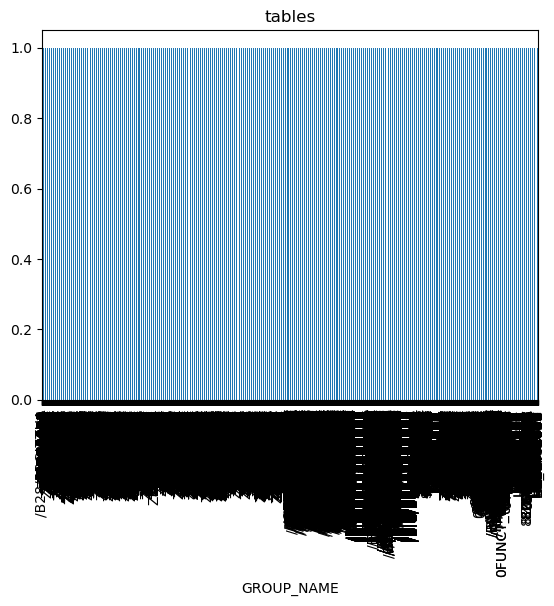

In [24]:
df_plot.GROUP_NAME.value_counts().plot(kind='bar')
plt.title('tables')
plt.show()

In [25]:
#help(pd.Categorical)